## 1st december


In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

dat = np.asarray(np.loadtxt('01.txt'))

dat_dx = np.diff(dat)
np.sum(np.where(dat_dx>0,1,0))

1195

In [28]:
# part 2
dat_3 = np.zeros_like(dat)
for i,_ in  enumerate(dat):
    dat_3[i] = np.sum(dat[i:i+3])
dat_3_dx = np.diff(dat_3[0:-2])

np.sum(np.where(dat_3_dx>0,1,0))

In [42]:
#oneliners 
part_1 = np.sum(np.where(np.diff(np.asarray(np.loadtxt('01.txt')))>0,1,0))

part_2 = np.sum(np.where(np.diff([np.sum(np.asarray(np.loadtxt('01.txt'))[i:i+3]) for i , _ in enumerate(np.asarray(np.loadtxt('01.txt'))) ][0:-2])>0,1,0))

print(part_1,part_2)

1195 1235


## 2nd december

In [36]:
dat = np.loadtxt('02.txt',dtype=str)

dat = np.char.split(dat)

f = 0
u = 0
d = 0
for i, val in enumerate(dat):
    if dat[i][0] == ['forward']:
        f = f + int(dat[i][1][0])
    elif dat[i][0] == ['up']:
        u = u + int(dat[i][1][0])
    elif dat[i][0] == ['down']:
        d = d + int(dat[i][1][0])

f * (d-u)

2272262

In [38]:
#part 2
dat = np.loadtxt('02.txt',dtype=str)

dat = np.char.split(dat)

aim = 0
hoz = 0
depth = 0
for i, val in enumerate(dat):
    if dat[i][0] == ['forward']:
        hoz = hoz + int(dat[i][1][0])
        depth = depth + aim * int(dat[i][1][0])
    elif dat[i][0] == ['up']:
        aim = aim - int(dat[i][1][0])
    elif dat[i][0] == ['down']:
        aim = aim + int(dat[i][1][0])

hoz * depth

2134882034

## 3rd december

In [13]:
import os 
import numpy as np
import matplotlib.pyplot as plt

dat = np.asarray(np.loadtxt('03.txt'))
dat = [str(int(i)) for i in dat]

for idx , val in enumerate(dat):
    if len(val)<14:
        for n in range(13-len(val)):
            dat[idx] = '0' + dat[idx]

dat_T = np.zeros(13, dtype=int)
print(range(len(dat)))

for i in range(len(dat_T)):
    for n in range(len(dat)):
        if dat[n][i]=='1':
            dat_T[i] = dat_T[i] + 1

    
print(dat_T[1:])  

range(0, 1000)
[487 485 519 505 480 495 509 482 492 520 484 502]


In [14]:
dat_res = np.zeros_like(dat_T)

dat_res = [1 if dat_T[i]-(len(dat)/2)>0 else 0 for i in range(len(dat_T))  ]
print(dat_res[1:])

[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]


In [15]:
lst = dat_res[1:]
res = int("".join(str(x) for x in lst), 2)
print(res)

lst_inv = [0 if i==1 else 1 for i in lst ]
res_inv = int("".join(str(x) for x in lst_inv), 2)
print(res_inv)
print(res_inv*res)

805
3290
2648450


In [72]:
# part 2 
oxy = [dat[i][1:] for i in range(len(dat))]

for i in range(len(oxy[0])):
    if len(oxy)==1:
        break
    
    oxy_T = np.zeros(12, dtype=int)
    
    for ii in range(len(oxy_T)):
        for n in range(len(oxy)):
            if oxy[n][ii]=='1':
                oxy_T[ii] = oxy_T[ii] + 1

    oxy_res = np.zeros_like(oxy_T)
    oxy_res = [1 if oxy_T[ii]-(len(oxy)/2)>=0 else 0 for ii in range(len(oxy_T))  ]
    #print(oxy_res)
    for n in range(len(oxy)):
        if int(oxy[n][i])!=oxy_res[i]:
            oxy[n]='0'
    oxy = [x for x in oxy if x != '0']
    print(len(oxy))


                

513
266
139
73
43
22
12
8
5
3
2
1


In [73]:
co2 = [dat[i][1:] for i in range(len(dat))]

for i in range(len(co2[0])):
    if len(co2)==1:
        break
    
    co2_T = np.zeros(12, dtype=int)
    
    for ii in range(len(co2_T)):
        for n in range(len(co2)):
            if co2[n][ii]=='1':
                co2_T[ii] = co2_T[ii] + 1

    co2_res = np.zeros_like(co2_T)
    co2_res = [1 if co2_T[ii]-(len(co2)/2)>=0 else 0 for ii in range(len(co2_T))  ]
    
    for n in range(len(co2)):
        if int(co2[n][i])==co2_res[i]:
            co2[n]='0'
    co2 = [x for x in co2 if x != '0']
    print(len(co2))



487
238
105
45
20
10
4
1


In [74]:
print(co2,oxy)
int(co2[0],2)*int(oxy[0],2)

['110100111000'] ['001101001001']


2845944

## 4th december

In [291]:
import os 
import numpy as np
import matplotlib.pyplot as plt

input = open('04.txt').read().split("\n\n") 

        
    

draw=[int(x) for x in i[0].split(",")] 
boards=[[[int(z) for z in y.split()] for y in x.split("\n")] for x in i[1:]] 

boards = np.array(boards,dtype=object)

bordz = np.zeros((100,5,5))


for x in range(bordz.shape[0]):
    for y in range(bordz.shape[1]): 
        for z in range(bordz.shape[2]):
            bordz[x,y,z] = int(boards[x][y][z])

boards = np.copy(bordz)



winners = np.zeros((1,3))
winners = winners-1

count=0
for idx,num in enumerate(draw):
    for x in range(0,boards.shape[0]): 
        for y in range(boards.shape[1]): 
            for z in range(boards.shape[2]):
                if boards[x,y,z] == num:
                    boards[x,y,z] = -1
        for y in range(boards.shape[1]): 
            if boards[x,y,:].sum()==-5:
                if not np.any(winners[:,0]==x):
                    winners = np.append(winners,np.array([x,num,idx],ndmin=2),axis=0)
        for z in range(boards.shape[2]): 
            if boards[x,:,z].sum()==-5:
                if not np.any(winners[:,0]==x):
                    winners = np.append(winners,np.array([x,num,idx],ndmin=2),axis=0)



                    
winners=winners[1:]   

print(len(winners))



100


In [294]:
board = np.copy(bordz[int(winners[0][0]),:,:])
for num in draw[:int(winners[0][2])+1]:
    for y in range(boards.shape[1]): 
            for z in range(boards.shape[2]):
                if board[y,z] == num:
                    board[y,z] = 0
                    
part_1 = board.sum()*winners[0][1]
print(part_1)

33462.0


In [297]:
board = np.copy(bordz[int(winners[-1][0]),:,:])
for num in draw[:int(winners[-1][2]+1)]:
    for y in range(boards.shape[1]): 
            for z in range(boards.shape[2]):
                if board[y,z] == num:
                    board[y,z] = 0
print(board)                    
board.sum()*winners[-1][1]

[[ 0.  0. 58.  0.  0.]
 [ 0.  0.  0. 43. 41.]
 [ 0. 80.  0.  0.  0.]
 [ 0.  0. 61.  0.  0.]
 [ 0. 27.  0.  0.  0.]]


30070.0

## 5th december

In [163]:
import os 
import numpy as np
import matplotlib.pyplot as plt

input = open('05.txt').read().split("\n")
input = [i.split(" -> ")for i in input]

for i,val in enumerate(input):
    for n in range(len(val)):
        input[i][n] = input[i][n].split(',')

        
def getStraight(input):
    print(1)

In [164]:
dat = np.zeros((1,4))#)np.array([])
for i,v in enumerate(input[:-1]):
    line = np.array([int(input[i][0][0]),int(input[i][0][1]),int(input[i][1][0]),int(input[i][1][1])],ndmin=2)
    dat = np.append(dat , line , axis=0)
dat = dat[1:]

In [172]:
straights = np.zeros((1,4))

for i,v in enumerate(dat):
    if v[0]==v[2] or v[1]==v[3]:
        straights = np.append(straights,v)        
straights=straights.reshape((-1,4))[1:]
print(np.shape(straights))

res = np.zeros((1000,1000), dtype=int)

for i,v in enumerate(straights):
    if v[0]==v[2]:
        minimum = int(np.min(v[[1,3]]))
        maximum = int(np.max(v[[1,3]]))
        res[int(v[0]),minimum:maximum+1]+=1
    if v[1]==v[3]:
        minimum = int(np.min(v[[0,2]]))
        maximum = int(np.max(v[[0,2]]))
        res[minimum:maximum+1,int(v[1])]+=1

np.shape(np.where(res>1))[1]
        

(353, 4)


7085

In [201]:
lines = np.zeros((1,4))

for i,v in enumerate(dat):
    lines = np.append(lines,v)        
lines=lines.reshape((-1,4))[1:]

res = np.zeros((1000,1000), dtype=int)

for i,v in enumerate(lines):
    if v[0]==v[2]:
        minimum = int(np.min(v[[1,3]]))
        maximum = int(np.max(v[[1,3]]))
        res[int(v[0]),minimum:maximum+1]+=1
    if v[1]==v[3]:
        minimum = int(np.min(v[[0,2]]))
        maximum = int(np.max(v[[0,2]]))
        res[minimum:maximum+1,int(v[1])]+=1
    if np.abs(v[0]-v[2])==np.abs(v[1]-v[3]):
        diffx = v[2]-v[0]
        diffy = v[3]-v[1]
        
        for n in range(int(np.abs(diffx)+1)):
            res[int(v[0]+int(n*np.sign(diffx))),int(v[1]+int(n*np.sign(diffy)))]+=1
        
        
np.shape(np.where(res>1))[1]
        

20271

## 6th december

In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt

with open('06.txt') as f:
    lines = f.readlines()
    
    
dat = np.asarray(lines[0][:].split(','))
dat = np.asarray([int(i) for i in dat])


def lantern(arr):
    for i,_ in enumerate(arr):
        arr[i]=arr[i]-1
    idx = np.where(arr==-1)
    arr[idx]=6
    
    if len(idx[0])>0:
        for n in range(0,len(idx[0])):
            arr = np.append(arr,8)
    return arr

def days(arr,n):
    for i in range(0,n):
        arr = lantern(arr)
        
    return arr
res = days(dat,1)

In [1]:
#actual solution to the problem
with open('06.txt') as f:
    dat = f.readlines()
dat = dat[:][0]

from collections import deque

def count_fish(data, days):
    life = [0]*9
    for i in data.split(','): life[int(i)] += 1
    fish = deque(life)
    
    for i in range(days):
        spawn = fish.popleft()
        fish[-2] += spawn
        fish.append(spawn)
    return sum(fish)

print('Part 1', count_fish(dat, 80))
print('Part 2', count_fish(dat, 256))

Part 1 395627
Part 2 1767323539209


## 7th december

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

data = [int(i) for i in open("07.txt").read().split(",")]

t = np.median(data)
f = sum([abs(x-t) for x in data])
print(f"Target pos {t}, Fuel: {f}")


cost = {i:sum([abs(x-i) * (abs(x-i)+1) / 2 for x in data]) for i in range(0, max(np.unique(data)))}
#print(cost)
result = min(cost, key=cost.get)
print(f"Target pos {result}, Fuel: {cost[result]}")

Target pos 321.0, Fuel: 335330.0
Target pos 457, Fuel: 92439766.0


## 8th december

In [3]:
from itertools import permutations

with open("08.txt") as f:
    data = f.readlines()

d = {"abcefg": 0,"cf": 1,"acdeg": 2,"acdfg": 3,"bcdf": 4,"abdfg": 5,"abdefg": 6,"acf": 7,"abcdefg": 8,"abcdfg": 9,}

part_1 = 0
part_2 = 0
for line in data:
    a, b = line.split(" | ")
    a = a.split()
    b = b.split()
    part_1 += sum(len(code) in {2, 3, 4, 7} for code in b)
    for permutation in permutations("abcdefg"):
        to = str.maketrans("abcdefg", "".join(permutation))
        aa = ("".join(sorted(code.translate(to))) for code in a)
        bb = ("".join(sorted(code.translate(to))) for code in b)
        if all(code in d for code in aa):
            part_2 += int("".join(str(d[code]) for code in bb))
            break

print('Part 1: ',part_1)
print('Part 2: ',part_2)

Part 1:  365
Part 2:  975706


## 9th december

In [2]:
import fileinput
from math import prod

grid = [list(map(int, list(line.strip()))) 
            for line in fileinput.input(files='09.txt')]

h, w = len(grid), len(grid[0])
inf = float('inf')

def neighbors(i, j):
    values = [
        (inf if i-1 < 0 else grid[i-1][j]),
        (inf if i+1 >= h else grid[i+1][j]),
        (inf if j-1 < 0 else grid[i][j-1]),
        (inf if j+1 >= w else grid[i][j+1])
    ]
    return values

def discover(i, j, seen):
    if i < 0 or i >= h or j < 0 or j >= w \
        or grid[i][j] == 9 or (i, j) in seen:
        return 
    seen.add((i, j))
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        discover(i+dx, j+dy, seen)

# Part 1
mins = []
for i in range(h):
    for j in range(w):
        if grid[i][j] < min(neighbors(i, j)):
            mins.append((i, j))
print(sum(1 + grid[i][j] for (i, j) in mins))

# Part 2
basins = []
for m in mins:
    seen = set()
    discover(*m, seen)
    basins.append(seen)

top3 = sorted(basins, key=lambda a: len(a))[-3:]
print(prod(len(b) for b in top3))

532
1110780


## 10th december

## 11th december

In [3]:
import numpy as np 


test = """
8807476555
5089087054
8597889608
8485769600
8700908800
6600088989
6800005943
0000007456
9000000876
8700006848
"""

def load_data(path): 
    with open(path) as f: 
        inputs = f.readlines()
    return np.array([[int(i) for i in input.strip()] for input in inputs])

def update_step(inputs): 
    return inputs + 1 

def get_adjacent(i, j): 
    return np.array([[i+di, j+dj]for dj in range(-1, 2) for di in range(-1, 2) if not ((dj == 0) and (di == 0))] )

def update_flashes(inputs): 
    has_flashed = np.zeros_like(inputs).astype(bool)
    inputs = inputs.copy()
    while (inputs[~has_flashed] > 9).sum():
        flashing = np.transpose(np.nonzero((inputs > 9) & (~has_flashed)))
        for i, j in flashing:
            to_update = get_adjacent(i, j)
            inputs[to_update[:, 0], to_update[:, 1]] += 1
            has_flashed[i, j] = True
    
    return inputs    

def single_day(inputs):
    inputs = inputs.copy()
    inputs = update_step(inputs) 
    inputs = update_flashes(inputs)
    has_flashed = inputs > 9
    inputs[has_flashed] = 0
    return inputs, has_flashed.sum()
        
def part_one():
    inputs = load_data("11.txt")
    inputs = np.pad(inputs, 1, constant_values=-10000)
    total = 0
    for _ in range(0, 100):
        inputs, num_flashed = single_day(inputs)
        total += num_flashed
    print(total)
        
def part_two():
    inputs = load_data("11.txt")
    inputs = np.pad(inputs, 1, constant_values=-10000)
    day = 1
    while True:
        inputs, num_flashed = single_day(inputs)
        if num_flashed == 100: 
            print(day)
            break
        day += 1
    
    
if __name__ == "__main__": 
    part_one()
    part_two()
    
        
    
    
    

1661
334


## 12th december

In [1]:




def load_nodes(file):
    nodes = dict()

    for l in file:
        s = l[:-1].split("-")

        if s[0] in nodes:
            nodes[s[0]].append(s[1])
        else:
            nodes[s[0]] = [s[1]]
        if s[1] in nodes:
            nodes[s[1]].append(s[0])
        else:
            nodes[s[1]] = [s[0]]
    return nodes

def isCaps(text):
    return text != text.lower()    

def process_node(nodes,curNode="start",prevNodes=[],p2=False,little=None):
    paths = []
    prevNodes.append(curNode)
    for n in nodes[curNode]:
        if n == "end":
            paths.append(["end"])
        elif n == "start":
            pass
        elif isCaps(n):
            paths = paths + process_node(nodes,n,prevNodes.copy(),p2,little)
        else:
            if n in prevNodes:
                if p2 and little == None:
                    paths = paths + process_node(nodes,n,prevNodes.copy(),p2,n)
            else:
                paths = paths + process_node(nodes,n,prevNodes.copy(),p2,little)
    temp = []
    for p in paths:
        temp.append([curNode]+p)
    return temp



file = open("12.txt","r")
nodes = load_nodes(file)
# print(nodes)
paths = process_node(nodes)
# print(paths)
print(len(paths))

paths = process_node(nodes,p2=True)
# print(paths)
print(len(paths))


5333
146553


## 13th december

In [1]:
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = open('13.txt').read().rstrip()
first, second = file.split('\n\n')
D = [] # coordinates of all original marked dots
for row in first.split('\n'):
    x, y = row.split(',')
    D.append((int(x), int(y)))
    
L = re.findall(r'[xy]=\d+', second)
INS = [] # fold instructions
for l in L:
    m, n = l.split('=')
    INS.append([m, int(n)])

In [10]:
for ins in INS:
    D2 = set()
    if ins[0] == 'x': 
        for d in D:
            if d[0] < ins[1]: 
                D2.add(d)
            elif d[0] > ins[1]:
                new_x = 2*ins[1] - d[0]
                D2.add((new_x, d[1]))
    elif ins[0] == 'y':
        for d in D:
            if d[1] < ins[1]: 
                D2.add(d)
            elif d[1] > ins[1]:
                new_y = 2*ins[1] - d[1]
                D2.add((d[0], new_y))
    D = list(D2)


In [4]:
X = []
Y = []
for d in list(D2):
    X.append(d[0])
    Y.append(-d[1])

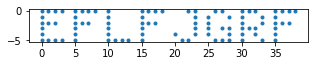

In [5]:
plt.figure(figsize=(5, 0.6))
plt.plot(X, Y, '.')

## 14th december

In [12]:

import copy
import re
from collections import defaultdict, Counter
from itertools import chain


def run_step(poly, rules):
    insertions = {}
    for pair, item in rules:
        positions = [idx.start() for idx in re.finditer(pattern='(?={0})'.format(pair), string=poly)]
        for idx in positions:
            insertions[idx + 1] = item
    poly = list(poly)
    for insert_idx in sorted(insertions.keys(), reverse=True):
        poly.insert(insert_idx, insertions[insert_idx])
    return ''.join(chain(*poly))


def part1(data):
    poly = data[0]
    rules = [rule.split(' -> ') for rule in data[2:]]
    for _ in range(10):
        poly = run_step(poly, rules)
    result = Counter(poly)
    return result.most_common()[0][1] - result.most_common()[-1][1]

def run_step_not_stupid(pairs, rules):
    tmp_add = Counter()
    tmp_remove = Counter()
    for pair, item in rules:
        tmp_add[pair[0] + item] += pairs[pair]
        tmp_add[item + pair[1]] += pairs[pair]
        tmp_remove[pair] += pairs[pair]
    for item in tmp_add.keys():
        pairs[item] += tmp_add[item]
    for item in tmp_remove.keys():
        pairs[item] -= tmp_remove[item]
    return pairs


def part2(data):
    poly = data[0]
    rules = [rule.split(' -> ') for rule in data[2:]]
    pairs = Counter([''.join(pair) for pair in zip(poly[:-1], poly[1:])])
    for _ in range(40):
        pairs = run_step_not_stupid(pairs, rules)
    result = Counter(poly[0])
    for pair in pairs:
        result[pair[1]] += pairs[pair]
    return result.most_common()[0][1] - result.most_common()[-1][1]


if __name__ == "__main__":
    with open(f"14.txt", encoding='utf-8', errors='ignore') as f:
        input_data = [line.rstrip() for line in f]

    print("Answer 1: ", part1(copy.copy(input_data)))
    print("Answer 2: ", part2(copy.copy(input_data)))

Answer 1:  2975
Answer 2:  3015383850689


## 15th december

In [2]:
from collections import defaultdict
from math import inf 
import heapq

D1 = [[int(i) for i in line] for line in open('15.txt').read().splitlines()]
D2 = [[(D1[j%len(D1)][i%len(D1)] + int(i/len(D1)) + int(j/len(D1)) -1) % 9 + 1 for i in range(len(D1) * 5)] for j in range(len(D1) * 5)]

def shortestPath(data):
    risk = defaultdict(lambda : inf, {(0,0):0})
    visited = defaultdict(lambda : False)
    heapq.heappush(Q := [], (0, (0,0)))
    while Q:
        x = heapq.heappop(Q)[1]
        visited[x] = True
        for n in [p for p in [(x[0]-1,x[1]), (x[0]+1,x[1]), (x[0],x[1]-1), (x[0],x[1]+1)] if p[0] in range(len(data)) and p[1] in range(len(data))]:
            if not visited[n]:    
                newRisk = risk[x] + data[n[0]][n[1]]
                if risk[n] > newRisk:
                    risk[n] = newRisk
                    heapq.heappush(Q, (newRisk, n))
    return risk[(len(data)-1, len(data)-1)]

print("Part 1:", shortestPath(D1))
print("Part 2:", shortestPath(D2))

Part 1: 739
Part 2: 3040


## 16th december

In [2]:
with open('16.txt', 'r') as f: s = f.read().strip('\n')

a = ""
for x in s:
    b = bin(int(x,16))[2:]
    a += "0"*(4-len(b)) + b

ans = [0,0]
def solve(t,vals):
    val = vals[0]
    if t==0: val+=sum(vals[1:])
    if t==1:
        for x in vals[1:]: val*=x
    if t==2:
        for x in vals: val = min(val,x)
    if t==3:
        for x in vals: val = max(val,x)
    if t==5: val = 1 if val>vals[1] else 0
    if t==6: val = 1 if val<vals[1] else 0
    if t==7: val = 1 if val==vals[1] else 0
    return val

def find(i):
    v = int(a[i:i+3],2)
    ans[0]+=v
    t = int(a[i+3:i+6],2)
    ln = 6

    if t==4:
        j = i+6
        lv = "0"
        while True:
            lv+=a[j+1:j+5]
            j+=5
            ln+=5
            if a[j-5]=="0": break

        return [ln, int(lv,2)]

    else:
        id = int(a[i+6])^1
        ln+=1
        vals = []
        ln += 11 + id*4
        sp = int(a[i+7:i+ln],2)
        j = i+ln
        if id:
            ln+=sp
            while sp>0:
                spv = find(j)
                j+=spv[0]
                sp-=spv[0]
                vals+=spv[1],

        else:
            while sp>0:
                spv=find(j)
                j+=spv[0]
                ln+=spv[0]
                vals+=spv[1],
                sp-=1

        return [ln, solve(t,vals)]

ans[1] = find(0)[1]
print(ans[0]) # for part 1
print(ans[1]) # for part 2

981
299227024091


## 17th december

In [1]:
from re   import findall
from math import sqrt

with open('17.txt') as f:
    ints = [int(i) for i in findall(r'-?\d+', f.read().strip())]

t_min = (ints[0], ints[2])
t_max = (ints[1], ints[3])
v0_min = (int(sqrt(t_min[0] * 2)), t_min[1])
v0_max = (t_max[0], abs(t_min[1] + 1))

print((v0_max[1] + 1) * v0_max[1] // 2)

def reaches_target(v):
    p = [0, 0]
    while True == True:
        for i in range(2): p[i] += v[i]
        v[0] -= 1 if v[0] else 0
        v[1] -= 1
        if p[0] > t_max[0] or p[1] < t_min[1]: return False
        if all((t_min[i] <= p[i] <= t_max[i] for i in range(2))): return True

r2 = 0
for v0_x in range(v0_min[0], v0_max[0] + 1):
    for v0_y in range(v0_min[1], v0_max[1] + 1):
        r2 += reaches_target([v0_x, v0_y])

print(r2)

3003
940


## 18th december

In [1]:
# [[1,2],3] becomes a list of either brackets or numbers, excluding comas:
# [ [ 1 2 ] 3 ]
def parse(line):
    import re
    return re.findall(r"\d+|[\[\]]", line)
lines = [parse(l.rstrip()) for l in open("18.txt").readlines()]

def int_to_pair(num):
    import math
    return [str(math.floor(num / 2)), str(math.ceil(num / 2))]

def add(a, b): return ['['] + a + b + [']']

def explode(sfnum, pos):
    def seek_digit(sfnum, pos, direction):
        while 0 < pos < len(sfnum)-1:
            pos += direction
            if sfnum[pos].isdigit(): return pos
        return None
    a,b = int(sfnum[pos]), int(sfnum[pos+1])
    l_pos = seek_digit(sfnum, pos, -1)
    r_pos = seek_digit(sfnum, pos+1, +1)
    if l_pos: sfnum[l_pos] = str(a + int(sfnum[l_pos]))
    if r_pos: sfnum[r_pos] = str(b + int(sfnum[r_pos]))
    return sfnum[0:pos-1] + ['0'] + sfnum[pos+3:]

def split(sfnum, pos):
    return sfnum[0:pos] + ['['] + int_to_pair(int(sfnum[pos])) + [']'] + sfnum[pos+1:]

def reduce_step(sfnum):
    depth = 0
    for pos in range(len(sfnum)):
        if sfnum[pos] == "[": depth += 1
        elif sfnum[pos] == "]": depth -= 1
        elif depth == 5: return explode(sfnum, pos)

    for pos in range(len(sfnum)):
        if sfnum[pos].isdigit() and int(sfnum[pos]) >= 10: return split(sfnum, pos)
    raise EOFError

def reduce_fully(sfnum):
    while True:
        try: sfnum = reduce_step(sfnum)
        except EOFError: break
    return sfnum

def add_list(numbers):
    result = numbers.pop(0)
    for i in numbers:
        result = reduce_fully(add(result, i))
    return(result)

def magnitude(sfnum):
    def p(sfnum):
        for i in range(len(sfnum)-1):
            if sfnum[i].isdigit() and sfnum[i+1].isdigit():
                sfnum = sfnum[0:i-1] + [str(int(sfnum[i]) * 3 + int(sfnum[i+1]) * 2)] + sfnum[i+3:]
                return sfnum
        raise EOFError
    while True:
        try: sfnum = p(sfnum)
        except EOFError: break
    return int(sfnum[0])

p1 = magnitude(add_list(lines))
print(f"Part 1: {p1}")

## Part 2 #############################################################

from itertools import permutations

p2 = 0
for a, b in permutations(lines, 2):
    val = magnitude(add_list([a, b]))
    if val > p2: p2 = val

print(f"Part 2: {p2}")

Part 1: 2541
Part 2: 4647


## 19th december

In [4]:
from scipy.spatial.distance import squareform,pdist,cdist
import itertools
from copy import deepcopy

from collections import deque
import itertools
import numpy as np
import pandas as pd

def get_distance_arrays(array1,array2):
    distance1 = squareform(pdist(array1))
    distance2 = squareform(pdist(array2))
    return distance1,distance2

def get_matched_coord_indices(distance1,distance2):
    m1 = []# match_list
    m2 = []# match_list
    s_list = []
    all_match_counts = []
    for i in range(0,distance1.shape[0]):
        for j in range(0,distance2.shape[0]):
            matched_distances = np.intersect1d(distance1[i].round(3),distance2[j].round(3))
            s = matched_distances.shape[0]
            #print(f"{s} matched distances")
            all_match_counts.append(s)
            if s >= 12:
                m1.append(i)
                m2.append(j)
                s_list.append(matched_distances)
    return m1,m2

def match_and_translate(array1, array2):
    distance1, distance2 = get_distance_arrays(array1, array2)
    m1, m2 = get_matched_coord_indices(distance1, distance2)
    if len(m1) >= 12:

        match_coords1 = np.array(array1)[m1]
        match_coords2 = np.array(array2)[m2]

        shift_list = []
        perm_list = []
        for i in range(3):
            shifts, perms = find_shifts(match_coords1[i], match_coords2[i])
            shift_list.append(shifts)
            perm_list.append(perms)
        translations = list(shift_list[2].intersection(
            shift_list[0].intersection(shift_list[1])))
        assert len(translations) == 1, 'should be unique translation'
        translation = translations[0]

        for i in range(3):
            weird_coord = perm_list[i][translation]
            if len(set(np.abs(weird_coord))) > 2:
                #f = build_translate_coord(match_coords2[1],weird_coord)
                f = build_translate_coord(weird_coord, match_coords2[i])
                break

        assert np.array_equal(
            f(match_coords2[i]), weird_coord
        ), f"translation didn't verify {(f(weird_coord), match_coords2[i])}"

        new_array2 = translate_all_coords(array2, f, translation)
        assert all(m in new_array2.tolist() for m in match_coords1.tolist()
                   ), f'translation failed to map all points {array2}'
        #   return match_coords1, match_coords2, array2,f, translation
        return match_coords1, match_coords2, new_array2,translation
    return None, None, None, None

def translate_all_coords(array,f,translation):
    out_list = []
    for i in range(array.shape[0]):
        l  = list(np.array(f(array[i])) + np.array(translation))
        out_list.append(l)
    return np.array(out_list)

def make_all_coord_permuations(x):
    """Beautiful isn't it?"""
    sign2 = [-x[0], x[1], x[2]]
    sign3 = [x[0], -x[1], x[2]]
    sign4 = [x[0], x[1], -x[2]]
    sign5 = [x[0], -x[1], -x[2]]
    sign6 = [-x[0], -x[1], -x[2]]
    sign7 = [-x[0], -x[1], x[2]]
    sign8 = [-x[0], x[1], -x[2]]
    return (list(itertools.permutations(sign2, 3)) +
            list(itertools.permutations(sign3, 3)) +
            list(itertools.permutations(x, 3)) +
            list(itertools.permutations(sign4, 3)) + 
            list(itertools.permutations(sign5, 3)) + 
            list(itertools.permutations(sign6, 3)) + 
            list(itertools.permutations(sign7, 3)) + 
            list(itertools.permutations(sign8, 3)) 

           )

def find_shifts(coord1,coord2):
    out = []
    all_permuations = make_all_coord_permuations(coord2)
    for c in all_permuations:
        out.append((coord1[0]-c[0],coord1[1]-c[1],coord1[2]-c[2]))
    lookup_dict = {key:val for key,val in zip(out,all_permuations)}
    return set(out), lookup_dict

def build_translate_coord(x1=[1,-2,3],x2=[-2,1,-3]):
    abs1 = [abs(x) for x in x1]
    abs2 = [abs(x) for x in x2]
    perms = list(itertools.permutations(abs2,3))
    indices = list(itertools.permutations([0,1,2],3))
    for i,x in enumerate(perms):
        ## this broke horribly with something like [1,-1,3] and [3,1,1]
        if list(x) == abs1:
            break
    new_x2 = [x2[z] for z in indices[i]]

    make_signs = [a//b for a,b in zip(new_x2,x1)]
    def translate_coord(x):
        return [x[a]*b for a,b in zip(indices[i],make_signs)]
    return translate_coord
    

def build_array_in_coord_zero(zero_coord_array_list,untranslated_arrays):
    queue = deque()
    leftover_arrays = []
    beacon_list = []
    while untranslated_arrays:
        success = False
        array = untranslated_arrays.pop(0)
        for t in zero_coord_array_list:
            _, _, translated_array, beacon_location = match_and_translate(
                t, array)
            if translated_array is not None:
                queue.append(translated_array)
                success = True
                beacon_list.append(beacon_location)


                break
        if not success:
            leftover_arrays.append(array)
    return queue + zero_coord_array_list, leftover_arrays, beacon_list

    

full_data = []


with open('19.txt') as f:
    array = []
    top = f.readline()
    for line in f.readlines():
        if len(line) < 3:
            continue
        if not line.strip().startswith('---'):
            row = [int(x.strip()) for x in line.split(',') if x.strip()]
            if row:
                array.append(row)
        else:
            full_data.append(np.array(array))
            array = []
    full_data.append(np.array(array))




untranslated = deepcopy(full_data)
probe_zero = untranslated.pop(0)
new_zeroes = deque([probe_zero])
full_beacon_list = []
i = 0
while untranslated and i < 50:
    i = i + 1
    new_zeroes, untranslated,beacon_list = build_array_in_coord_zero(new_zeroes,untranslated)
    #print(f"untranslated remaining {len(untranslated)}")
    full_beacon_list.extend(beacon_list)


full_explored_space = pd.concat([pd.DataFrame(x) for x in new_zeroes])

print(f"Part 1: {full_explored_space.drop_duplicates().shape[0]}")

print(f"Part 2: {pdist(np.array(full_beacon_list),metric='cityblock').max()}")
    

Part 1: 326
Part 2: 10630.0


## 20th december

In [8]:
import numpy as np
 
def scanner_enhance(file_path, max_run):
 
    with open(file_path) as fin:
        algo, image = fin.read().strip().split('\n\n')
 
    algo_b = {}
 
    for i, val in enumerate(algo):
        if val == '#':
            algo_b[i] = 1
        else:
            algo_b[i] = 0
 
    image = image.split('\n')
    image_b = np.zeros((len(image), len(image[0])), dtype=int)
 
    for i, row in enumerate(image):
        for j, val in enumerate(row):
            if val == '#':
                image_b[i,j] = 1
            else:
                image_b[i,j] = 0
 
    run = 1
 
    while run <= max_run:
        if algo_b[1] == 1 and not run % 2:
            image_pad = np.ones((image_b.shape[0] + 4,
                                 image_b.shape[1] + 4),
                                dtype=int)
        else:
            image_pad = np.zeros((image_b.shape[0] + 4,
                                  image_b.shape[1] + 4),
                                 dtype=int)
 
        image_pad[2:-2,2:-2] = image_b
 
        e_image = np.zeros((image_b.shape[0] + 2,
                            image_b.shape[1] + 2),
                           dtype=int)
 
        for loc, val in np.ndenumerate(image_pad):
            x, y = loc
            if (x in range(1, len(image_pad) - 1)
                and y in range(1, len(image_pad) - 1)):
                sub_pix = image_pad[x-1:x+2, y-1:y+2]
                pix_str = ''
                for row in sub_pix:
                    for s_val in row:
                        pix_str += str(s_val)
 
                e_image[x-1, y-1] = algo_b[int(pix_str, 2)]
        
        image_b = e_image.copy()
        run += 1
        
    return np.count_nonzero(image_b)
 

 

print('part 1:',scanner_enhance('20.txt', 2))
print('part 2:',scanner_enhance('20.txt', 50))
 


part 1: 5647
part 2: 15653


## 21th december

In [12]:
import copy
def part1(p1,p2):
    score1 = 0
    score2 = 0
    cur_val = 1
    rolls = 0
    while True:
        rolls += 3
        p1 = (p1 + 3*cur_val+ 3) % 10
        cur_val =(cur_val+3) % 100
        score1 += p1 if p1 else 10
        if score1 > 999:
            break
        p2 = (p2 + 3*cur_val+ 3) % 10
        rolls += 3
        cur_val =(cur_val+3) % 100
        score2 += p2 if p2 else 10
        if score2 > 999:
            break
    return min(score1,score2)*rolls

def calc_turns(start):
    turns = {(start,0,0):1}
    tot_turns = {}
    probs = {3:1,4:3,5:6,6:7,7:6,8:3,9:1}
    while len(turns):
        new_turns = {}
        for space,score,turn_num in turns:
            for roll in probs:
                key = ((space+roll)%10, score+(((space+roll)%10)if(space+roll)%10 else 10),turn_num+1)
                if key[1]> 20:
                    if key[2] in tot_turns:
                       tot_turns[key[2]] += probs[roll]*turns[(space,score,turn_num)]
                    else:
                       tot_turns[key[2]] = probs[roll]*turns[(space,score,turn_num)]
                    continue
                if key in new_turns:
                   new_turns[key] += probs[roll]*turns[(space,score,turn_num)]
                else:
                   new_turns[key] = probs[roll]*turns[(space,score,turn_num)]
        turns = copy.deepcopy(new_turns)
    return tot_turns 

def get_counts(p1_tot_turns, p2_tot_turns):
    p1_cts = 0
    p2_cts = 0
    p1_rem_scenarios = {0:1}
    p2_rem_scenarios = {0:1}
    for num_rolls in range(1,max(p1_tot_turns)+2):
        if num_rolls in p1_tot_turns:
           p1_rem_scenarios[num_rolls] = 27*p1_rem_scenarios[num_rolls-1]-p1_tot_turns[num_rolls]
        else:
           p1_rem_scenarios[num_rolls] = 27*p1_rem_scenarios[num_rolls-1]
        if num_rolls in p2_tot_turns:
           p2_rem_scenarios[num_rolls] = 27*p2_rem_scenarios[num_rolls-1]-p2_tot_turns[num_rolls]
        else:
           p2_rem_scenarios[num_rolls] = 27*p2_rem_scenarios[num_rolls-1]
    for i in p1_tot_turns:
        p1_cts +=p1_tot_turns[i]*p2_rem_scenarios[i-1]
        p2_cts +=p2_tot_turns[i]*p1_rem_scenarios[i]
    return p1_cts, p2_cts 

def part2(p1,p2):
    p1_tot_turns = calc_turns(p1)
    p2_tot_turns = calc_turns(p2)
    return max(get_counts(p1_tot_turns,p2_tot_turns))


p1 = 10
p2 = 2
sol1 = part1(p1,p2)
sol2 = part2(p1,p2)
print("Solution 1:%d\nSolution 2: %d" % (sol1, sol2)) 

Solution 1:916083
Solution 2: 49982165861983


10460353203

## 22th december

In [3]:
import re

def crop(seq, limits):
    crop = seq.copy()
    for l in range(len(crop)):
        (s0,s1) = limits[l]
        (c0,c1) = crop[l]
        c0 = max(c0,s0)
        c1 = min(c1,s1)
        crop[l]=(c0,c1) if c0<c1 else (0,0)
    return crop

def empty(seq):
    return seq[0] == (0,0) or seq[1] == (0,0) or seq[2] == (0,0)

class Box:
    def __init__(self, seq):
        self.limits = seq
        self.boxes = []
    
    def subtract(self, seq):
        cropped = crop(seq, self.limits)
        if empty(cropped):
            return
        box = Box(cropped)
        for inner in self.boxes:
            inner.subtract(cropped)
        self.boxes.append(box)
    
    def volume(self):
        tot = 1
        for (a,b) in self.limits:
            tot *= (b-a)
        return tot - sum(box.volume() for box in self.boxes)

def parse(lines):
    ret = []
    for line in lines:
        m = re.search(r'(on|off) x=(-?\d+)..(-?\d+),y=(-?\d+)..(-?\d+),z=(-?\d+)..(-?\d+)', line)
        x0,x1,y0,y1,z0,z1 = [int(m.group(i)) for i in range(2,8)]
        bit = m.group(1) == "on"
        ret.append(([(x0,x1+1),(y0,y1+1),(z0,z1+1)], bit))
    return ret

def solve(inputs, bounds = None):
    total = 0
    boxes = []
    for (seq, on) in inputs:
        if bounds:
            seq = crop(seq,bounds)
        if empty(seq):
            continue
        box = Box(seq)
        for another in boxes:
            another.subtract(seq)
        if on:
            boxes.append(box)
    return sum(box.volume() for box in boxes)


dims = parse(open("22.txt").read().splitlines())

vol1 = solve(dims, [(-50,51),(-50,51),(-50,51)])
print(vol1)
vol2 = solve(dims)
print(vol2)

623748
1227345351869476


In [6]:
import collections as c, re

def intersect(x,X,y,Y,z,Z, u,U,v,V,w,W):
    x = max(x, u); y = max(y, v); z = max(z, w)
    X = min(X, U); Y = min(Y, V); Z = min(Z, W)
    if x <= X and y <= Y and z <= Z:
        return x, X, y, Y, z, Z

def size(x,X,y,Y,z,Z):
    return (X-x+1) * (Y-y+1) * (Z-z+1)

cubes = c.defaultdict(int)
for state, new in map(str.split, open('22.txt')):
    new = *map(int, re.findall(r'-?\d+', new)),

    for old in cubes.copy():
        inter = intersect(*new, *old)
        if inter: cubes[inter] -= cubes[old]

    if state == "on": cubes[new] = 1

print(sum(size(*c)*v for c,v in cubes.items()))

1231252947741109


## 23th december

In [2]:
from functools import lru_cache
import numpy as np

rooms_1 = (("D", "B"), ("D", "A"), ("C", "A"), ("B", "C"))
rooms_2 = (("D", "D", "D", "B"), ("D", "C", "B", "A"), ("C", "B", "A", "A"), ("B", "A", "C", "C"))

def f(lines):
    room_map = (2, 4, 6, 8)
    hall_spots = (0, 1, 3, 5, 7, 9, 10)
    destination = {"A": 0, "B": 1, "C": 2, "D": 3}
    costs = {"A": 1, "B": 10, "C": 100, "D": 1000}

    room_size = len(lines[0])

    hallway_start = tuple(None for _ in range(len(room_map) + len(hall_spots)))

    @lru_cache(maxsize=None)
    def helper(hallway, rooms):
        if rooms == (("A",) * room_size, ("B",) * room_size, ("C",) * room_size, ("D",) * room_size):
            return 0

        best_cost = float('inf')
        for i, square in enumerate(hallway):  # Move from the hallway into a room.
            if square is None:
                continue
            dest = destination[square]
            can_move = True
            for roommate in rooms[dest]:
                if roommate is not None and roommate != square:
                    # Foreigner in room: can't move there.
                    can_move = False
                    break
            if not can_move:
                continue
            offset = 1 if room_map[dest] > i else -1
            for j in range(i + offset, room_map[dest] + offset, offset):
                if hallway[j] is not None:
                    can_move = False
                    break
            if not can_move:
                continue
            none_count = sum(elem is None for elem in rooms[dest])
            new_room = (None,) * (none_count - 1) + (square,) * (room_size - none_count + 1)
            steps = none_count + abs(i - room_map[dest])
            cost = steps * costs[square]
            helper_result = helper(hallway[:i] + (None,) + hallway[i + 1:], rooms[:dest] + (new_room,)
                                   + rooms[dest + 1:])
            new_cost = cost + helper_result
            if new_cost < best_cost:
                best_cost = new_cost
        for i, room in enumerate(rooms):  # Move from a room into the hallway.
            wants_to_move = False
            for elem in room:
                if elem is not None and destination[elem] != i:
                    wants_to_move = True
            if not wants_to_move:
                continue
            none_count = sum(elem is None for elem in room)
            steps = none_count + 1
            square = room[none_count]
            for hall_destination in hall_spots:
                destination_steps = steps + abs(hall_destination - room_map[i])
                destination_cost = destination_steps * costs[square]
                blocked = False
                for j in range(min(hall_destination, room_map[i]), max(hall_destination, room_map[i])+1):
                    if hallway[j] is not None:
                        blocked = True
                        break
                if blocked:
                    continue
                new_room = (None,) * (none_count + 1) + room[none_count + 1:]
                helper_result = helper(
                    hallway[:hall_destination] + (square,) + hallway[hall_destination + 1:],
                    rooms[:i] + (new_room,) + rooms[i + 1:])
                new_cost = destination_cost + helper_result
                if new_cost < best_cost:
                    best_cost = new_cost

        return best_cost

    cost = helper(hallway_start, lines)
    return cost

print('part 1:', f(rooms_1))
print('part 2:', f(rooms_2))


part 1: 16157
part 2: 43481


## 24th december

In [3]:
import functools
import sys
inf = sys.argv[1] if len(sys.argv) > 1 else 'input'

ll = [x for x in open('24.txt').read().strip().split('\n')]



# BEGIN <UNUSED SECTION>
vs = 'wxyz'
def simulate(line, state):
	state = list(state)
	cmd = line.split(" ")[0]
	if cmd == 'inp':
		raise Exception("")
	a = line.split(" ")[1]
	b = line.split(" ")[2]
	def parse(x):
		if x in vs:
			return state[vs.index(x)]
		return int(x)
	if cmd == 'add':
		state[vs.index(a)] += parse(b)
	if cmd == 'mul':
		state[vs.index(a)] *= parse(b)
	if cmd == 'div':
		state[vs.index(a)] //= parse(b)
	if cmd == 'mod':
		state[vs.index(a)] %= parse(b)
	if cmd == 'eql':
		state[vs.index(a)] = int(state[vs.index(a)] == parse(b))
	return tuple(state)
@functools.lru_cache(maxsize=None)
def run2(ch, zstart, w):
	state = (w, 0, 0, zstart)
	for i in range(ch*18+1, ch*18+18):
		state = simulate(ll[i], state)
	r = state[3]
	print(run(ch, zstart, w) == r)
	return r
# END </UNUSED SECTION>


# my input
#AX = [13, 11, 15, -11, 14, 0, 12, 12, 14, -6, -10, -12, -3, -5]
#DZ = [1, 1, 1, 26, 1, 26, 1, 1, 1, 26, 26, 26, 26, 26]
#AY = [13, 10, 5, 14, 5, 15, 4, 11, 1, 15, 12, 8, 14, 9]

AX = []
DZ = []
AY = []
for lineno, line in enumerate(ll):
	if "add x " in line and "add x z" not in line:
		AX.append(int(line.split()[2]))
	if "div z " in line:
		DZ.append(int(line.split()[2]))
	if "add y " in line and lineno%18 == 15:
		AY.append(int(line.split()[2]))
print("Extracted from input", AX, DZ, AY)

if len(AX) != 14 or len(DZ) != 14 or len(AY) != 14:
	raise Exception("couldn't understand your input")

def run(ch, z, w):
	x = AX[ch] + (z % 26)
	z = z // DZ[ch]
	if x != w:
		z *= 26
		z += w + AY[ch]
	return z

Zbudget = [26**len([x for x in range(len(DZ)) if DZ[x]==26 and x >= i]) for i in range(len(DZ))]
print("Threshold for giving up due to Z being too high, at each stage has been calculated as", Zbudget)
CANDIDATES = list(range(1, 10))
@functools.lru_cache(maxsize=None)
def search(ch, zsofar):
	if ch == 14:
		if zsofar == 0:
			return [""]
		return []
	if zsofar > Zbudget[ch]:
		return []
	xwillbe = AX[ch] + zsofar % 26
	wopts = CANDIDATES
	if xwillbe in range(1, 10):
		wopts = [xwillbe]
	ret = []
	for w in wopts:
		znext = run(ch, zsofar, w)
		nxt = search(ch + 1, znext)
		for x in nxt:
			ret.append(str(w) + x)
	return ret

solns = search(0, 0)
solns = [int(x) for x in solns]
print("num solutions", len(solns))
print(max(solns), min(solns))



Extracted from input [13, 12, 12, 10, -11, -13, 15, 10, -2, -6, 14, 0, -15, -4] [1, 1, 1, 1, 26, 26, 1, 1, 26, 26, 1, 26, 26, 26] [8, 13, 8, 10, 12, 1, 13, 5, 10, 3, 2, 2, 12, 7]
Threshold for giving up due to Z being too high, at each stage has been calculated as [8031810176, 8031810176, 8031810176, 8031810176, 8031810176, 308915776, 11881376, 11881376, 11881376, 456976, 17576, 17576, 676, 26]
num solutions 94080
59998426997979 13621111481315


## 25th december

In [13]:

#!/usr/bin/python3
import sys
import heapq
import itertools
import re
import ast
from collections import defaultdict, Counter, deque
#from aocd import submit
from copy import deepcopy

#submit(len(G), part="a", day=25, year=2021)
infile = '25.txt'
data = open(infile).read().strip()

G = []
for line in data.split('\n'):
  assert line.strip() == line
  G.append(line)
R = len(G)
C = len(G[0])

t = 0
while True:
  t += 1
  moved = False
  G2 = [[G[r][c] for c in range(C)] for r in range(R)]
  for r in range(R):
    for c in range(C):
      if G[r][c] == '>':
        if G[r][(c+1)%C] == '.':
          moved = True
          G2[r][(c+1)%C] = '>'
          G2[r][c] = '.'
  G3 = [[G2[r][c] for c in range(C)] for r in range(R)]
  for r in range(R):
    for c in range(C):
      if G2[r][c] == 'v' and G2[(r+1)%R][c] == '.':
        moved = True
        G3[(r+1)%R][c] = 'v'
        G3[r][c] = '.'
  if not moved:
    print(t)
    
  G = G3
  #print(t, moved)

print(len(G)) 

353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602


KeyboardInterrupt: 